In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
import statsmodels.api as sm

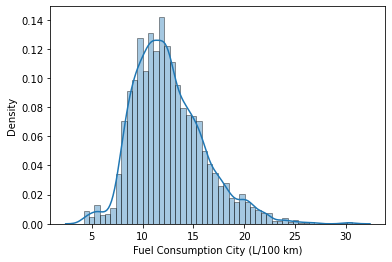

In [ ]:
sns.distplot(df['Fuel Consumption City (L/100 km)'],hist=True,hist_kws=dict(ec='k'))

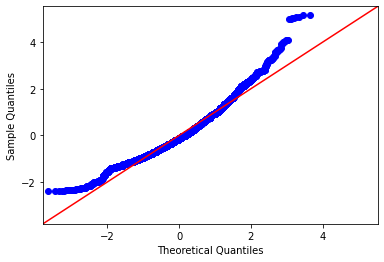

In [ ]:
plot=sm.qqplot(df['Fuel Consumption City (L/100 km)'],line="45",fit=True)

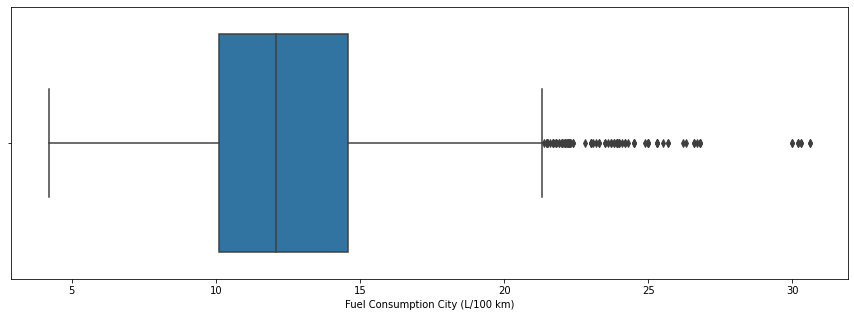

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Fuel Consumption City (L/100 km)', data=df)

The plots indicate that distribution is not normally distributed. Now carry out statistical tests 1. Chi2 test 2. Anderson test
Null hypothesis- Data is from normal distribution
Alternate Hypothesis- Data is not normally distributed

In [ ]:
chi2,p=stats.normaltest(df['Fuel Consumption City (L/100 km)'])
print('Chi2=%.2f,pvalue=%.3f' %(chi2,p))

Chi2=813.13,pvalue=0.000


In [ ]:
stats.anderson(df['Fuel Consumption City (L/100 km)'],dist='norm')

AndersonResult(statistic=64.20399153553808, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
from scipy import stats
_ , l = stats.boxcox(df['Fuel Consumption City (L/100 km)'])

In [ ]:
print ("lamda     : " ,l)

lamda     :  0.17302331040769608


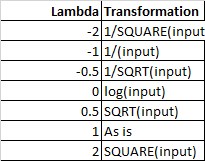

As Lambda is over 0 apply square root to transform

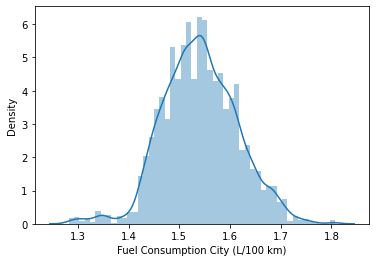

In [ ]:
sns.distplot(df['Fuel Consumption City (L/100 km)'].apply(lambda x: np.power(x, l)), hist=True)

Observe the transformed plots and it is closer to normal distribution